<a href="https://colab.research.google.com/github/ArrogantNobody/Pytorch_study/blob/main/pytorch_foundation_fast_build_load_and_save.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference：https://zhuanlan.zhihu.com/p/115251842

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [9]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(3)+0.1*torch.randn(x.size())

x , y =(Variable(x),Variable(y))

The net structure we used before
```
class Net(nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = nn.Linear(n_input,n_hidden)
        self.hidden2 = nn.Linear(n_hidden,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
    def forward(self,input):
        out = self.hidden1(input)
        out = F.relu(out)
        out = self.hidden2(out)
        out = F.relu(out)
        out =self.predict(out)

        return out
```

In [6]:
net1 = torch.nn.Sequential(
    nn.Linear(1,20),
    torch.nn.ReLU(),#Sigmoid
    nn.Linear(20,20),
    torch.nn.ReLU(),
    nn.Linear(20,1)
)
print(net1)

Sequential(
  (0): Linear(in_features=1, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=1, bias=True)
)


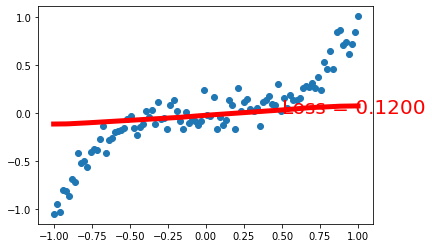

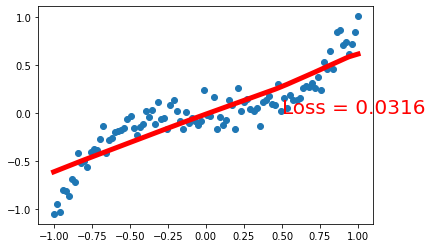

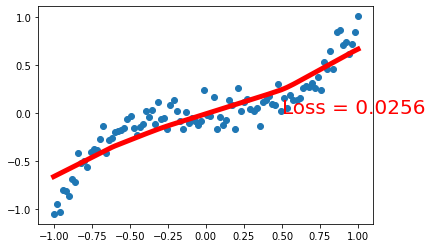

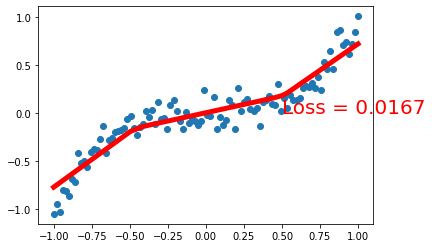

In [10]:
optimizer = torch.optim.SGD(net1.parameters(),lr = 0.05)
loss_func = torch.nn.MSELoss()

plt.ion()
plt.show()

for t in range(2000):
    prediction = net1(x)
    loss = loss_func(prediction,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t%500 ==0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss = %.4f' % loss.data, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.05)

In [12]:
torch.save(net1,'net.pkl')    #保存所有的网络参数,包括结构
torch.save(net1.state_dict(),'net_parameter.pkl')    #保存优化选项默认字典，不保存网络结构

The net.pkl include the whole net structure, we can load it simply using 'torch.load', whereas the net_parameter.pkl，we should bulid a same net structure to implement remapping to extract weights and parameters.

In [13]:
net1 = torch.load('net.pkl')
net2 = torch.nn.Sequential(
    nn.Linear(1,20),
    torch.nn.ReLU(),
    nn.Linear(20,20),
    torch.nn.ReLU(),
    nn.Linear(20,1)
)
net2.load_state_dict(torch.load('net_parameter.pkl'))

<All keys matched successfully>

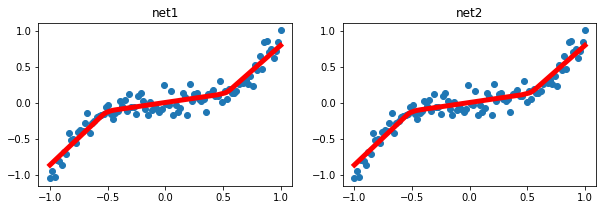

In [14]:
prediction1 = net1(x)
prediction2 = net2(x)

#visualization
plt.figure(1,figsize=(10,3))
plt.subplot(121)
plt.title('net1')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction1.data.numpy(), 'r-', lw=5)
# plt.show()

plt.figure(1,figsize=(10,3))
plt.subplot(122)
plt.title('net2')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction2.data.numpy(), 'r-', lw=5)
plt.show()